<a href="https://colab.research.google.com/github/alyssanew/CS2A_Alcantara/blob/main/2A_ALCANTARA_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1. Data Processing

1.1 Load the Dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = pd.read_csv('Netflix_Userbase.csv')
print(data.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


2.1 Missing Values

In [ ]:
print(data.isnull())

      User ID  Subscription Type  Monthly Revenue  Join Date  \
0       False              False            False      False   
1       False              False            False      False   
2       False              False            False      False   
3       False              False            False      False   
4       False              False            False      False   
...       ...                ...              ...        ...   
2495    False              False            False      False   
2496    False              False            False      False   
2497    False              False            False      False   
2498    False              False            False      False   
2499    False              False            False      False   

      Last Payment Date  Country    Age  Gender  Device  Plan Duration  
0                 False    False  False   False   False          False  
1                 False    False  False   False   False          False  
2           

2.2 Encode Categorical Variables

In [ ]:
encode_data= pd.get_dummies(data, columns=['Subscription Type', 'Join Date','Last Payment Date','Country', 'Gender', 'Device', 'Plan Duration'])
print(encode_data)

      User ID  Monthly Revenue  Age  Subscription Type_Basic  \
0           1               10   28                        1   
1           2               15   35                        0   
2           3               12   42                        0   
3           4               12   51                        0   
4           5               10   33                        1   
...       ...              ...  ...                      ...   
2495     2496               14   28                        0   
2496     2497               15   33                        1   
2497     2498               12   38                        0   
2498     2499               13   48                        0   
2499     2500               15   35                        1   

      Subscription Type_Premium  Subscription Type_Standard  \
0                             0                           0   
1                             1                           0   
2                             0           

1.4 Feature Selection

In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['res outcome'] = (data['Outcome']>0).astype(int)
x = data_dummies.drop(['Age', 'Monthly Revenue'],axis=1)
y = data_dummies['']

NameError: name 'pd' is not defined

Part 2: Exploratory Data Analysis

2.1 Descriptive Statistics

In [ ]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


2.2 Visualizations

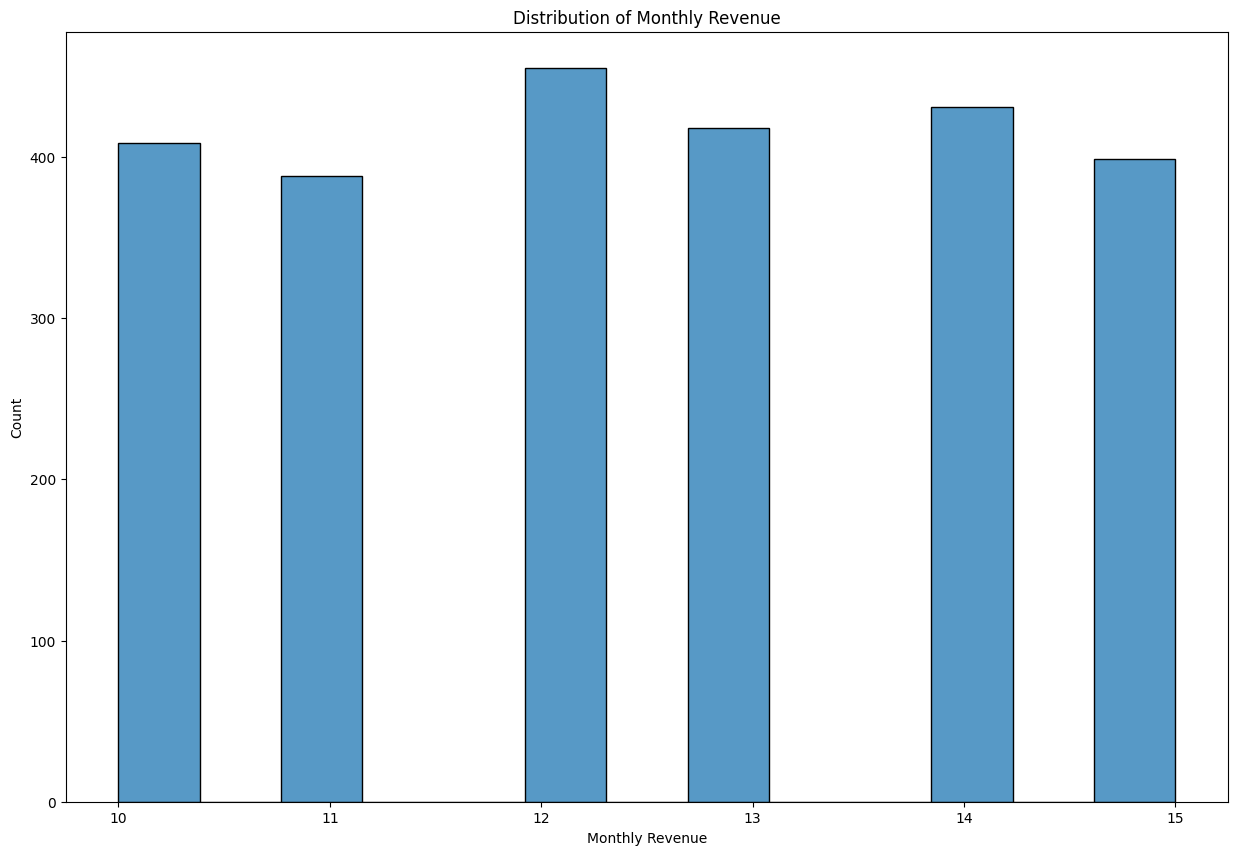

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Distribution of Monthly Revenue")
sns.histplot(x="Monthly Revenue", data=data, multiple='stack')
plt.show()


In [ ]:
country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'User Count']

fig = px.choropleth(country_counts, locations='Country', locationmode='country names',
                    color='User Count', hover_name='Country',
                    title=' User Demographics',
                    color_continuous_scale='Plasma')

fig.show()

Part 3:  Linear Regression Model

 3.1 Build the Model

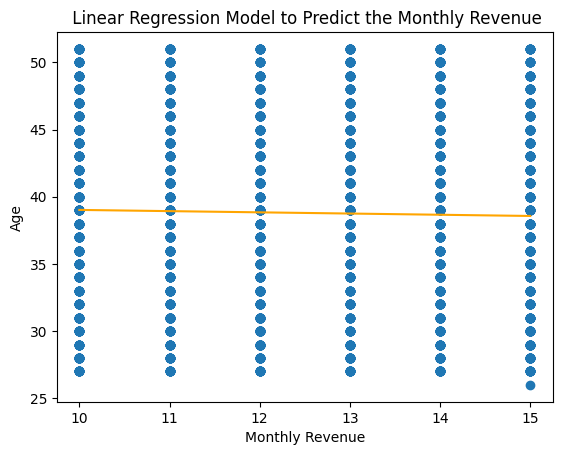

In [ ]:
x = data[['Monthly Revenue']]
y = data['Age']

model = LinearRegression()
model.fit(x,y)

plt.scatter(x,y)
plt.plot(x,model.predict(x),color='orange')
plt.xlabel('Monthly Revenue')
plt.ylabel('Age')
plt.title(' Linear Regression Model to Predict the Monthly Revenue')
plt.show()

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope:", slope)
print("Intercept: ", intercept)

Slope: [0.76753269]
Intercept:  [-4.48918083  0.08473508  0.28469789  0.21176123  0.39117161  0.37223252
 -0.01755778  0.12552265  0.09281651  0.24979355  0.21043791  0.26685508
  0.13834971  0.33904727  0.15156936  0.27279694  0.13585631  0.05741383
  0.06526131  0.02658219  0.13638479  0.23106471  0.17930025  0.13838565
  0.19010639  0.15459585]


3.2 Model Evaluation

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)


LinearRegression()

In [ ]:
revenue_predictions = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, revenue_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, revenue_predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 48.34679390183033
Root Mean Squared Error (RMSE): 6.953185881438115
R-squared Score: 0.001313563184495048


In [ ]:
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

Part 4: Logistic Regression Model

 4.1  Model Building

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=80)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)


LogisticRegression()

4.2 Model Evaluation

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"accuracy:{accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

accuracy:0.0
Confusion Matrix: 
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:134

Part 5: Comparative Analysis and Visualization


5.1 Feature Importance

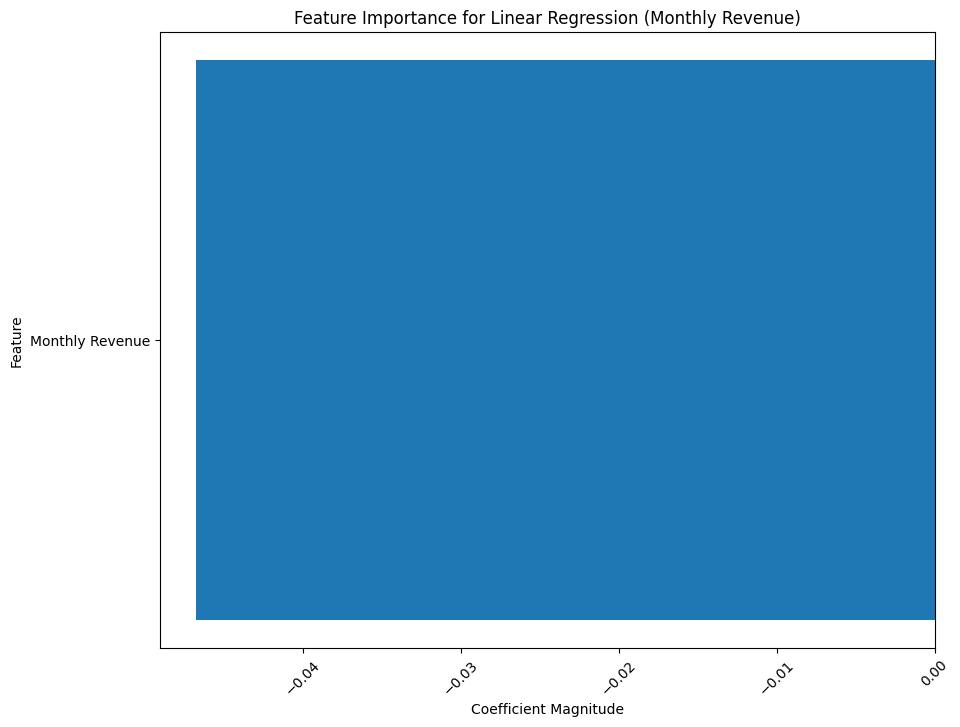

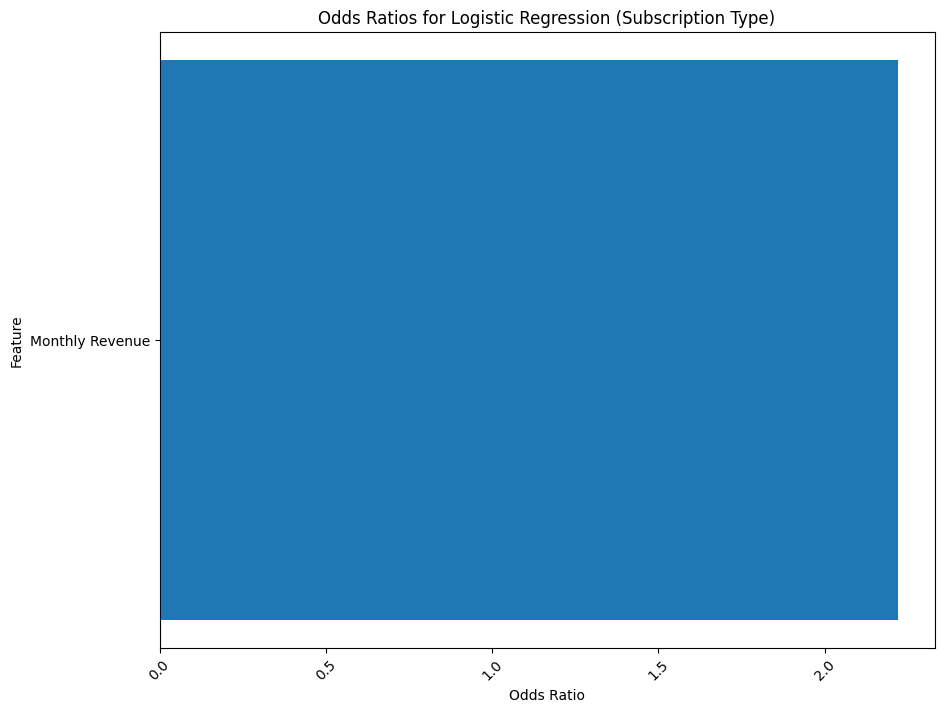

In [ ]:

linearreg_coefficients = linear_reg_model.coef_
feature_names = x.columns

plt.figure(figsize=(10, 8))
plt.barh(feature_names, linearreg_coefficients[0])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear Regression (Monthly Revenue)')
plt.xticks(rotation=45)
plt.show()

logistic_reg_odds_ratios = np.exp(logistic_reg_model.coef_[0])
feature_names = x.columns

plt.figure(figsize=(10, 8))
plt.barh(feature_names, logistic_reg_odds_ratios)
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Odds Ratios for Logistic Regression (Subscription Type)')
plt.xticks(rotation=45)
plt.show()

5.2 Insights

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



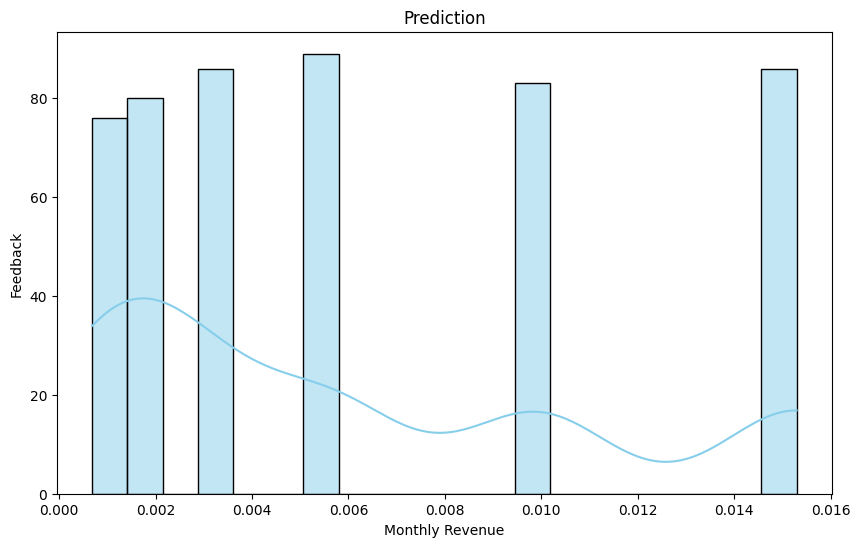

In [ ]:
y_pred_probs = model.predict_proba(x_test)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(y_pred_probs, bins=20, kde=True, color='skyblue')
plt.title('Prediction')
plt.xlabel('Monthly Revenue')
plt.ylabel('Feedback')
plt.show()

Each factors have a impacts to the monthly revenue and feedback. For example, if there are a lot of people who choose the Premium subscription for the month of March, it will result to a high Monthly revenue compared to the past months. And so on for other factors.

In [ ]:
ft_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
ft_importance.sort_values(by='Importance', ascending=False, inplace=True)

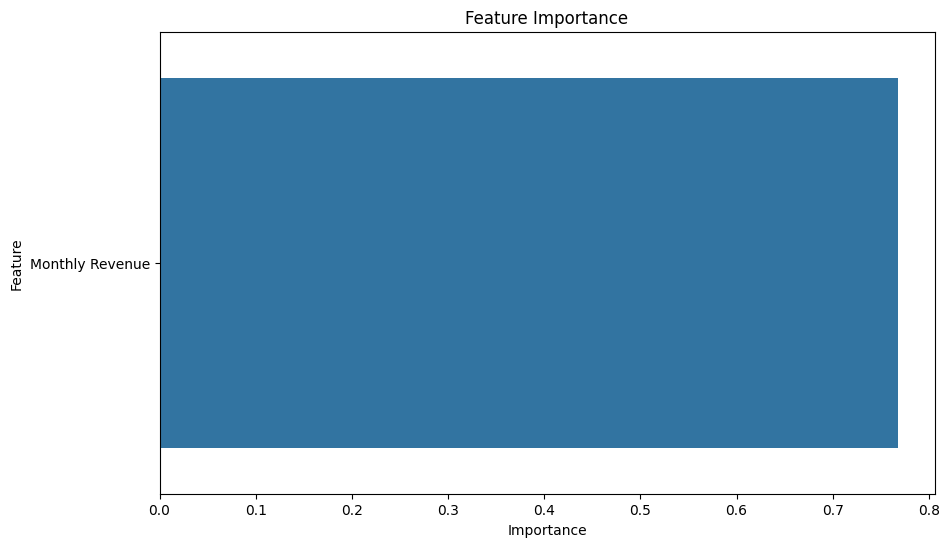

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=ft_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()